# Importing Libraries

Currently using numpy, matplotlib, pandas, and scipy

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.spatial.distance import cdist

# Reading in Datasets and saving them

This code shows the reading of the traning and testing data sets. These are stored in my personal github for easier access.

In [ ]:
# Put the test model
dataset1_test = pd.read_csv("https://raw.githubusercontent.com/akimmi/EE559_hw1/main/dataset1_test.csv", header = None)
dataset2_test = pd.read_csv("https://raw.githubusercontent.com/akimmi/EE559_hw1/main/dataset2_test.csv", header = None)
dataset3_test = pd.read_csv("https://raw.githubusercontent.com/akimmi/EE559_hw1/main/dataset3_test.csv", header = None)

testing_datasets = [dataset1_test, dataset2_test, dataset3_test]

In [ ]:
#compute the class means

# Step 1: csv files
dataset1_train = pd.read_csv("https://raw.githubusercontent.com/akimmi/EE559_hw1/main/dataset1_train.csv", header = None)
dataset2_train = pd.read_csv("https://raw.githubusercontent.com/akimmi/EE559_hw1/main/dataset2_train.csv", header = None)
dataset3_train = pd.read_csv("https://raw.githubusercontent.com/akimmi/EE559_hw1/main/dataset3_train.csv", header = None)

training_datasets = [dataset1_train, dataset2_train, dataset3_train]
# training_datasets = [dataset1_train]

# pltDecBoundaries Function Code

Code given by Professor Jenkins.

In [ ]:
# Plot the training data, the class means, the decision boundary, and decision regions
def plotDecBoundaries(training, label_train, sample_mean, fsize=(6,4)):
    
    '''
    Plot the decision boundaries and data points for minimum distance to
    class mean classifier
    
    training: traning data, N x d matrix:
        N: number of data points
        d: number of features
        if d > 2 then the first and second features will be plotted (1st and 2nd column (0 and 1 index))
    label_train: class lables correspond to training data, N x 1 array:
        N: number of data points
        the labels should start numbering from 1 (not 0)
        code works for up to 3 classes
    sample_mean: mean vector for each class, C x d matrix:
        C: number of classes
        each row of the sample_mean matrix is the coordinate of each sample mean
    '''

    #
    # Total number of classes
    nclass =  max(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.005

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    dist_mat = cdist(xy, sample_mean)
    pred_label = np.argmin(dist_mat, axis=1)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')



    #show the image, give each coordinate a color according to its class label
    plt.figure(figsize=fsize)
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    # plot the class training data.
    plt.plot(training[label_train == 1, 0],training[label_train == 1, 1], 'rx')
    plt.plot(training[label_train == 2, 0],training[label_train == 2, 1], 'go')
    if nclass == 3:
        plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')

    # include legend for training data
    if nclass == 3:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    else:
        l = plt.legend(('Class 1', 'Class 2'), loc=2)
    plt.gca().add_artist(l)

    # plot the class mean vector.
    m1, = plt.plot(sample_mean[0,0], sample_mean[0,1], 'rd', markersize=12, markerfacecolor='r', markeredgecolor='w')
    m2, = plt.plot(sample_mean[1,0], sample_mean[1,1], 'gd', markersize=12, markerfacecolor='g', markeredgecolor='w')
    if nclass == 3:
        m3, = plt.plot(sample_mean[2,0], sample_mean[2,1], 'bd', markersize=12, markerfacecolor='b', markeredgecolor='w')

    # include legend for class mean vector
    if nclass == 3:
        l1 = plt.legend([m1,m2,m3],['Class 1 Mean', 'Class 2 Mean', 'Class 3 Mean'], loc=4)
    else:
        l1 = plt.legend([m1,m2], ['Class 1 Mean', 'Class 2 Mean'], loc=4)

    plt.gca().add_artist(l1)

    plt.show()

# Part A

Function to seperate the feature columns and label column into np arrays of the appropriate size this code works for any size (hopefully)


I/O: pandas DataFrame -> np.array, np.array

In [ ]:
def get_features_label(df):
  class_column = len(df.columns) - 1 # index of the last column where class is
  classes = np.unique(df[class_column]) # an array of all classes in the dataset

  features = df.iloc[:, df.columns[:class_column]].values # Getting all feature columns into np array 2D
  label = df[class_column].values # get class column as an np array

  return features, label


Function calculates the mean of each column (that is not the class column/last)

I/O: pandas dataframe -> np Array

In [ ]:
def calculate_mean(features, labels):
  # Get unique labels
  unique_labels = np.unique(labels)
  try:
    num_features = features.shape[1]
    mean_arr = np.zeros((len(np.unique(y)), num_features))
  except IndexError:
    num_features = 1
    mean_arr = np.zeros(2)
  # Initiliaze a 2D numpy array to hold mean values
  

  for i, label in enumerate(unique_labels): # iterate for every class
    # filter by labels:
    filtered_features = features[np.where(labels == label)]

    for n in range(num_features): # iterate for every column
      # Calculate mean of the array and store in the matrix appropriately
      if num_features == 1:
        mean_arr[i] = np.mean(filtered_features)
      else:
        mean_arr[i][n] = np.mean(filtered_features[:, n])
  
  # Return 2D Array of Means
  return mean_arr

In [ ]:
x, y = get_features_label(dataset1_train)
print(calculate_mean(x, y))

[[0.08893115 1.08956606]
 [1.04128622 0.01994688]]


In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([0, 1, 0])

# find unique values in b
unique_b = np.unique(b)

# create empty list to store group results
grouped_a = []

# iterate over unique values in b
for value in unique_b:
    # create a mask for current value
    mask = np.where(b == value)
    print(mask)
    # apply mask to a and append result to grouped_a
    grouped_a.append(a[mask])

print(grouped_a)

(array([0, 2]),)
(array([1]),)
[array([[1, 2],
       [5, 6]]), array([[3, 4]])]


Classification Error Function, counts the number of misclassified points and calculates the % error

I/O: features, labels, mean_arr -> double (%)

In [ ]:
def classification_error(features, labels, mean_arr):
  count = 0
  #iterating through all feature points
  for ix, feature_point in enumerate(features): 

    # make a list of length(mean_arr) to hold all distances from feature to mean
    distance = np.zeros(len(mean_arr))

    # Calculate all distances and append to distance list 
    for mean_ix in range(len(mean_arr)):
      # calculating Euclidean distance and adding to the list
      distance[mean_ix] = np.linalg.norm(feature_point - mean_arr[mean_ix])
    
    # Decide if classification was correct
    if distance.argmin() + 1 != labels[ix]:
      count += 1

  return (count / len(features)) * 100

Printing Plots of Decicion Boundaries for all traning datasets

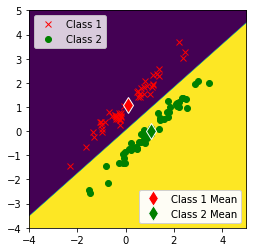

Classification Error: 0.0%




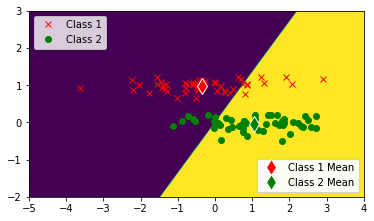

Classification Error: 17.0%




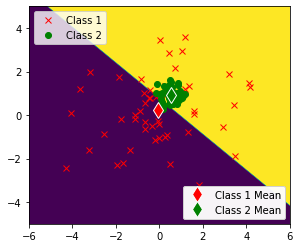

Classification Error: 23.0%




In [ ]:
list_means = [] # Used to store the mean arrays of all traning datasets

for dataset in training_datasets: # Run for every dataset
  features, labels = get_features_label(dataset) # get features and label 
  mean_arr = calculate_mean(features, labels) # Calculate the mean

  list_means.append(mean_arr) # Store in this list for training dataset Classification error calc.
  # Note these are stored as numpy arrays inside a list -> [Array([...]), Array([...]), ...]

  # Plot Decision Boundaries
  plotDecBoundaries(features,
                    labels,
                    mean_arr)
  percentage = classification_error(features,
                             labels,
                             mean_arr)
  print(f"Classification Error: {percentage}%\n\n")

Classification Error for all testing datasets

In [ ]:
for index in range(len(testing_datasets)):
  features, labels = get_features_label(testing_datasets[index])
  percentage = classification_error(features, labels, list_means[index])
  print(f"Testing Dataset {index + 1} | Classification Error: {percentage}%")


Testing Dataset 1 | Classification Error: 0.0%
Testing Dataset 2 | Classification Error: 26.0%
Testing Dataset 3 | Classification Error: 23.0%


# Part B


# Part C

The function below normalizes the feature columns in a dataframe (using numpy arrays but because of the input to calculate_mean and get_features_label we return a dataframe)

In [ ]:
# def normalize(df, mean_std = None):
#   class_column = len(df.columns) - 1 # index of the last column where class is

#   data = df.iloc[:, df.columns[:class_column]].values # Getting all feature columns into np array 2D

#   if mean_std:
#     df.iloc[:, df.columns[:class_column]] = ((data - mean_std[0]) / mean_std[1])
#     return df

#   means = np.mean(data, axis=0)
#   stds = np.std(data, axis=0)
#   df.iloc[:, df.columns[:class_column]] = ((data - means) / stds)
#   return df, [means, stds]

In [ ]:
def normalize(features, labels, mean_std = None):
  if mean_std:
    return (features - mean_std[0]) / mean_std[1]
  
  means = np.mean(features, axis = 0)
  stds = np.std(features, axis = 0)
  return (features - means) / stds, [means, stds]

Here we are normalizing the data before we calculate the means and extract features and labels.

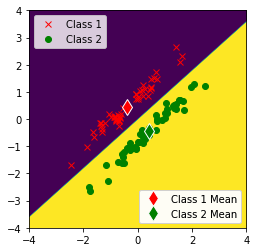

Classification Error: 0.0%




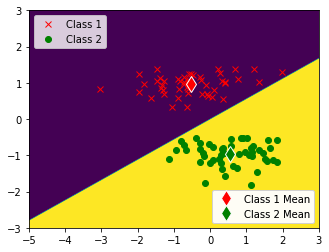

Classification Error: 0.0%




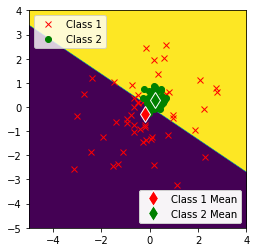

Classification Error: 24.0%




In [ ]:
list_means = [] # Used to store the mean arrays of all traning datasets
list_mean_std = []
training_mean_std = None

for dataset in training_datasets: # Run for every dataset
  features, labels = get_features_label(dataset) # get features and label
  # dataset, training_mean_std = normalize(dataset) # Normalizing data
  features, training_mean_std = normalize(features, labels)
  list_mean_std.append(training_mean_std) # Saving these for testing datasets

  mean_arr = calculate_mean(features, labels) # Calculate the mean

  list_means.append(mean_arr) # Store in this list for training dataset Classification error calc.
  # Note these are stored as numpy arrays inside a list -> [Array([...]), Array([...]), ...]
  
  # Plot Decision Boundaries
  plotDecBoundaries(features,
                    labels,
                    mean_arr)
  percentage = classification_error(features,
                             labels,
                             mean_arr)
  print(f"Classification Error: {percentage}%\n\n")

Summary of classification error for training datasets

In [ ]:
for index in range(len(training_datasets)):
  features, labels = get_features_label(training_datasets[index])
  dataset, means = normalize(features, labels)
  percentage = classification_error(features, labels, list_means[index])
  print(f"Training Dataset {index + 1} | Classification Error: {percentage}%")

Training Dataset 1 | Classification Error: 0.0%
Training Dataset 2 | Classification Error: 10.0%
Training Dataset 3 | Classification Error: 26.0%


Normalizing and calculating the classifiction error for testing datasets

In [ ]:
for index in range(len(testing_datasets)):
  features, labels = get_features_label(testing_datasets[index])
  dataset = normalize(features, labels)
  
  percentage = classification_error(features, labels, list_means[index])
  print(f"Testing Dataset {index + 1} | Classification Error: {percentage}%")

Testing Dataset 1 | Classification Error: 0.0%
Testing Dataset 2 | Classification Error: 18.0%
Testing Dataset 3 | Classification Error: 28.999999999999996%


# Part D

# Part E

Creating Direction Vectors to project on

In [ ]:
rm = [] # initializing a list and not np.empty because you can't append empty with an np array
for m in range(40): # range(40) since there are 40 different vectors
  if m < 10:
    rm.append(np.array((10, m)))
  elif m < 30:
    rm.append(np.array((20 - m, 10)))
  else:
    rm.append(np.array((-10, 40 - m)))

rm = np.array(rm)

Function projects the an array of features ont the rm vectors we calculated above. This returns a 1D vector of feature space

In [ ]:
def project(features, r_sub_m):
  # using .T here to make these lists into matrixes so that there are no shape erros
  return np.dot(r_sub_m.T, features.T) / (np.linalg.norm(r_sub_m))

In [ ]:
def calculate_projection_errors(train_features, train_labels, test_features, test_labels):
  train1_data_norm, trn_mean_std = normalize(train_features, train_labels)

  test1_data_norm, tst_mean_std = normalize(test_features, test_labels)

  error_rate = []

  for ri in rm:
    projected_x = project(train1_data_norm, ri)
    mean_arr_proj = calculate_mean(projected_x, train_labels)
    # print(mean_arr_proj)
    err_rate = classification_error(projected_x, train_labels, mean_arr_proj)
    error_rate.append(err_rate)

  # plot the projection errors calculates
  plt.plot(np.arange(len(error_rate)), error_rate)
  plt.title("Error vs m")
  plt.xlabel("m")
  plt.ylabel("Error Percentage (%)")
  plt.show()

  print("\n\n")

  optimal_m = error_rate.index(min(error_rate))
  rm_optimal = []
  if optimal_m < 10:
    rm_optimal.append(np.array((10, optimal_m)))
  elif optimal_m < 30:
    rm_optimal.append(np.array((20 - optimal_m, 10)))
  else:
    rm_optimal.append(np.array((-10, 40 - optimal_m)))

  
  # Couldn't finsh 
  



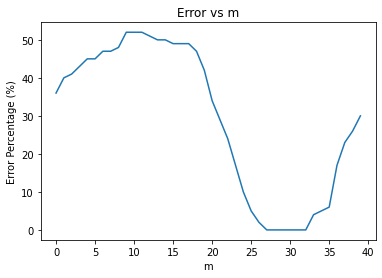

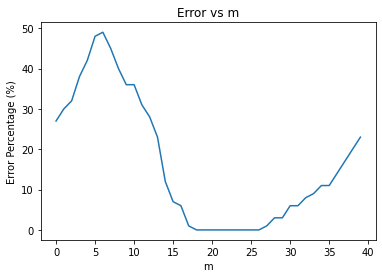

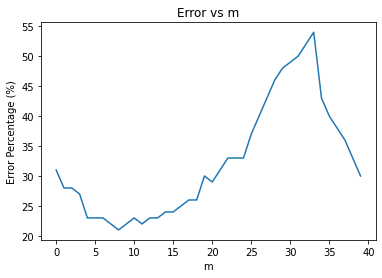

In [ ]:
for i in range(len(training_datasets)):
  train_features, train_labels = get_features_label(training_datasets[i]) 
  test_features, test_labels = get_features_label(testing_datasets[i])

  calculate_projection_errors(train_features, 
                              train_labels, 
                              test_features, 
                              test_labels
                              )

For some reason, my charts are flipped, and I couldn't figure out why this was happening.

# Part F